In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Bidirectional
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf

2023-10-07 00:02:26.017581: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-07 00:02:26.019209: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-07 00:02:26.055764: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-07 00:02:26.056671: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-07 00:02:26.901897: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
df = yf.download('AAPL',start='2000-01-01',end='2023-09-01')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.848323,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.776801,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.788168,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.719961,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.754065,460734400
...,...,...,...,...,...,...
2023-08-25,177.380005,179.149994,175.820007,178.610001,178.610001,51449600
2023-08-28,180.089996,180.589996,178.550003,180.190002,180.190002,43820700
2023-08-29,179.699997,184.899994,179.500000,184.119995,184.119995,53003900


In [3]:
df.shape

(5954, 6)

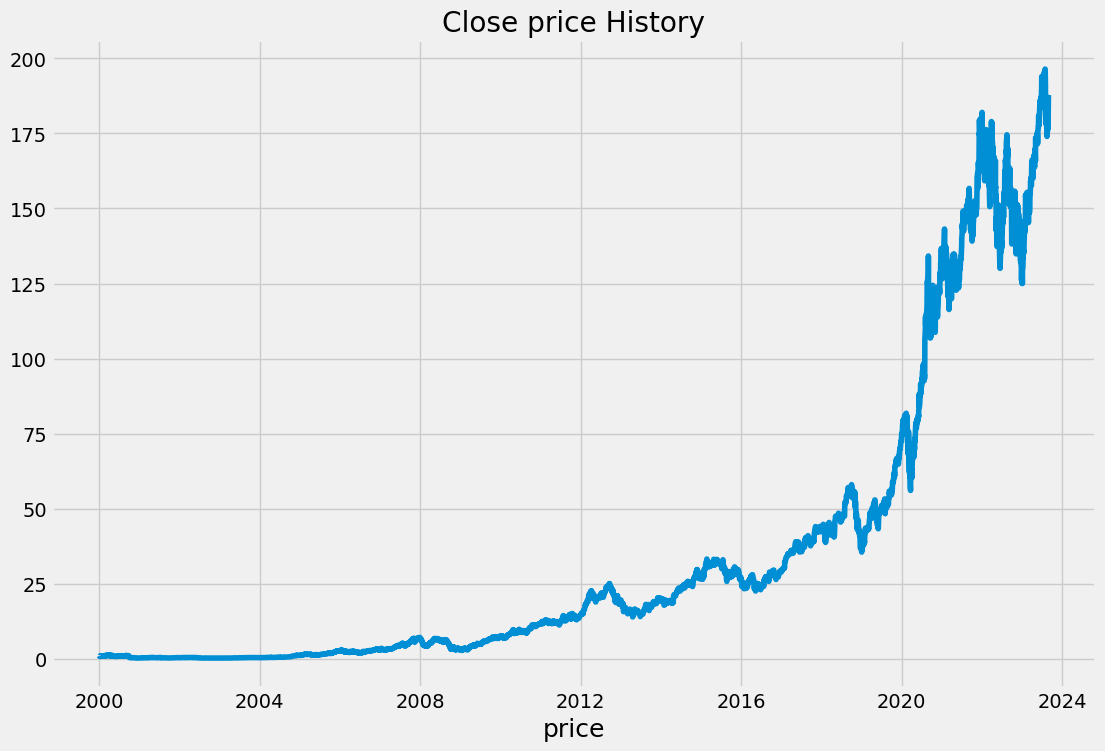

In [4]:
plt.figure(figsize=(12,8))
plt.title('Close price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.xlabel('price',fontsize=18)
plt.show()

In [5]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.9)
# dataset.shape

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00389957],
       [0.00347012],
       [0.00353838],
       ...,
       [0.93716099],
       [0.95515138],
       [0.95627261]])

In [7]:
train_data  = scaled_data[0:training_data_len,:]
x_train = []
y_train = []
for i in range(40,len(train_data)):
    x_train.append(train_data[i-40:i,0])
    y_train.append(train_data[i,0])
    if i <= 40:
        print(x_train)
        print(y_train)
        print()

[array([0.00389957, 0.00347012, 0.00353838, 0.00312884, 0.00333361,
       0.00325398, 0.00302646, 0.00277335, 0.00320847, 0.00337627,
       0.00353553, 0.00365498, 0.00397067, 0.00387113, 0.00364076,
       0.00391378, 0.00381993, 0.0038114 , 0.00343031, 0.003527  ,
       0.00336774, 0.00330232, 0.00350709, 0.0037204 , 0.00399626,
       0.00403323, 0.00393085, 0.00397067, 0.00375452, 0.00407589,
       0.00422094, 0.0039991 , 0.00403323, 0.00386828, 0.00398488,
       0.0040958 , 0.00404816, 0.00382847, 0.00395929, 0.00402186])]
[0.004735696263065402]



In [8]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [9]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(5319, 40, 1)

In [10]:
from tensorflow.keras.layers import LSTM, Bidirectional, Dense
from tensorflow.keras.models import Sequential

model = Sequential()

# Replace your LSTM layers with Bidirectional LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(x_train.shape[1], 1)))
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Bidirectional(LSTM(100, return_sequences=False)))

# Add output layers
model.add(Dense(1))
model.add(Dense(1))

# Compile your model as needed
# model.compile(...)


In [11]:
model.compile(optimizer='adam',loss='mse')


In [12]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
167/167 [==============================] - 42s 164ms/step - loss: 6.2470e-04
Epoch 2/50
167/167 [==============================] - 18s 108ms/step - loss: 2.0882e-04
Epoch 3/50
167/167 [==============================] - 20s 118ms/step - loss: 1.4338e-04
Epoch 4/50
167/167 [==============================] - 19s 116ms/step - loss: 7.7245e-05
Epoch 5/50
167/167 [==============================] - 18s 109ms/step - loss: 6.6804e-05
Epoch 6/50
167/167 [==============================] - 15s 92ms/step - loss: 6.6659e-05
Epoch 7/50
167/167 [==============================] - 17s 103ms/step - loss: 6.4801e-05
Epoch 8/50
167/167 [==============================] - 17s 99ms/step - loss: 6.0439e-05
Epoch 9/50
167/167 [==============================] - 16s 96ms/step - loss: 4.6745e-05
Epoch 10/50
167/167 [==============================] - 16s 96ms/step - loss: 4.6307e-05
Epoch 11/50
167/167 [==============================] - 16s 97ms/step - loss: 6.4137e-05
Epoch 12/50
167/167 [==============

In [13]:
test_data = scaled_data[training_data_len -40: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(40,len(test_data)):
    x_test.append(test_data[i-40:i,0])


In [14]:
x_test = np.array(x_test)
x_test =  np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [15]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

19/19 [==============================] - 3s 23ms/step


In [16]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

3.969049215679135

(595, 1)


/tmp/ipykernel_41375/856311049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


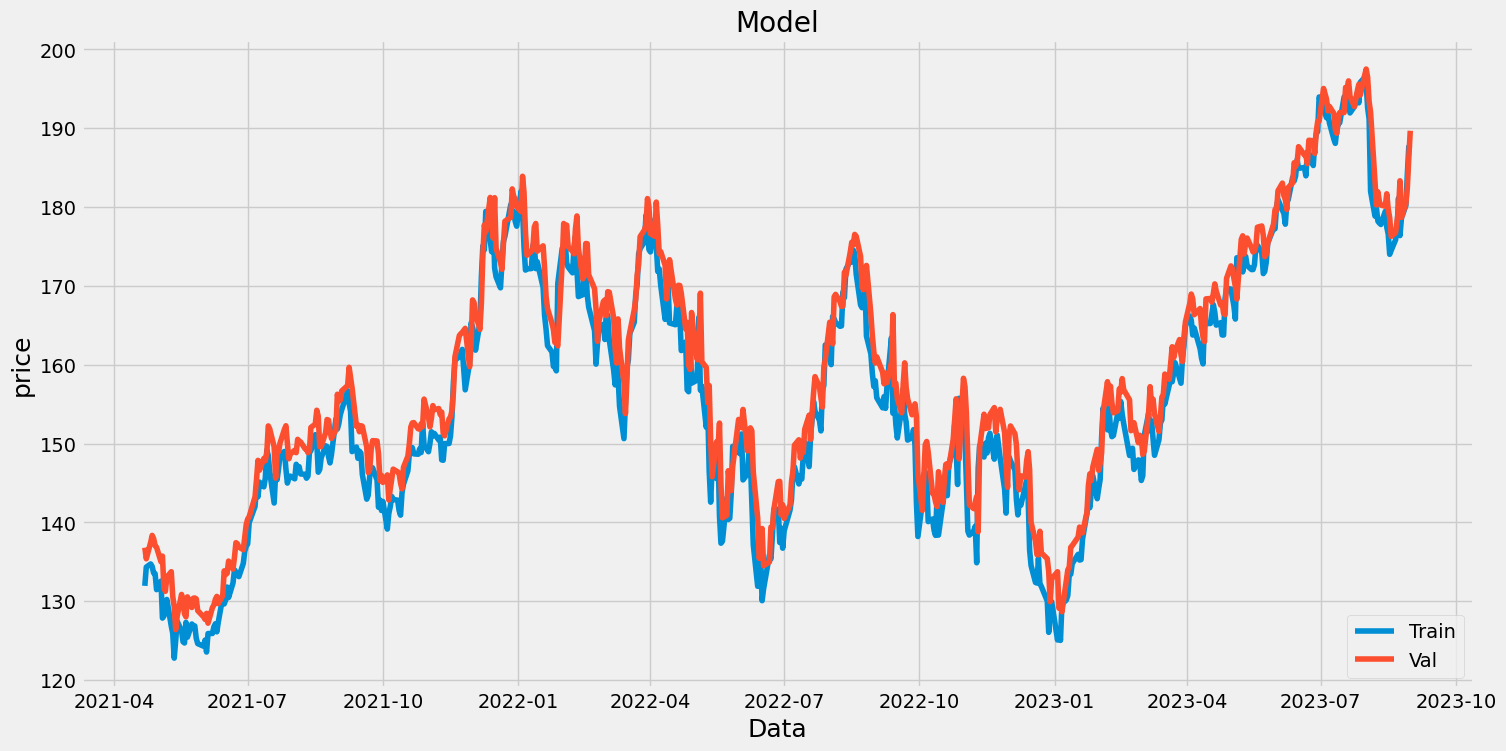

In [17]:
train = data[:training_data_len]
valid = data[training_data_len:]
print(valid.shape)
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data',fontsize=18)
plt.ylabel('price',fontsize=18)
# plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'],loc='lower right')
plt.show()

In [18]:
for i in range(len(valid)-1):
    print(valid['Close'][i],valid['predictions'][i])

131.94000244140625 136.78616
134.32000732421875 135.37485
134.72000122070312 137.46794
134.38999938964844 138.3393
133.5800018310547 137.94084
133.47999572753906 137.02957
131.4600067138672 136.83263
132.5399932861328 134.99869
127.8499984741211 135.71637
128.10000610351562 131.63785
129.74000549316406 131.24893
130.2100067138672 133.05098
126.8499984741211 133.73517
125.91000366210938 130.60371
122.7699966430664 129.27463
124.97000122070312 126.39443
127.44999694824219 128.07301
126.2699966430664 130.85205
124.8499984741211 130.06857
124.69000244140625 128.38863
127.30999755859375 128.01009
125.43000030517578 130.543
127.0999984741211 129.19394
126.9000015258789 130.37021
126.8499984741211 130.3965
125.27999877929688 130.28593
124.61000061035156 128.79869
124.27999877929688 128.0081
125.05999755859375 127.68741
123.54000091552734 128.45009
125.88999938964844 127.2029
125.9000015258789 129.17566
126.73999786376953 129.50703
127.12999725341797 130.22668
126.11000061035156 130.5996
127.3

/tmp/ipykernel_41375/3896828834.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(valid['Close'][i],valid['predictions'][i])


In [19]:
print(valid['Close'][2])

134.72000122070312


/tmp/ipykernel_41375/3224889160.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(valid['Close'][2])
